# **CD2201-16: Ciencia de Datos en Astronomía**

**Profesores:** Boris Cuevas, Paula Díaz, Danilo Sepúlveda, Francisco Urbina

# **Tarea 2: Análisis Estadístico Simple**
En esta tarea continuaremos practicando con *Numpy, Pandas y Matplotlib* mientras también aprenderán a realizar análisis estadísticos básicos con estas librerías.

A estas alturas ya deben tener una noción de estadística y su aplicación en astronomía. La tarea consiste en hacer estimaciones sencillas a partir de datos astronómicos, usando herramientas básicas de Python que permiten trabajar con la estadística de distribuciones de datos.

La tarea está dividida en dos partes. La primera consiste en realizar una estimación del movimiento propio de un cúmulo globular ubicado en el halo de nuestra Galaxia a partir de la distribución de estos datos. La segunda parte consiste en comprobar cómo cambia la Señal a Ruido (S/N) al promediar varios espectros de un objeto. No es necesario que tengan conocimientos previos de astronomía por ahora, basta con que sepan manipular los datos indicados.

Esta tarea involucra la creación de varias figuras. Así que **póngase creativo con las figuras :D, sus colores, formas, leyendas, etc. También asegúrese de siempre colocar un título y nombre a los ejes!**

In [5]:
# Antes de comenzar con la tarea debe correr esta celda para importar las librerías principales a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Primera parte: Estimar movimiento propio del cúmulo globular NGC 5694


En esta primera parte trataremos de estimar una cantidad en astronomía que se llama "movimiento propio" para un cúmulo globular llamado [NGC 5694](https://en.wikipedia.org/wiki/NGC_5694). Éste cúmulo globular se encuentra en el halo de nuestra Vía Láctea.

El movimiento propio de una estrella es el desplazamiento que esta tiene en el cielo, visto desde la Tierra, con el paso del tiempo. Aunque las estrellas parecen fijas a simple vista, en realidad se están moviendo a través del espacio. El movimiento propio mide este cambio en la posición de la estrella, no hacia nosotros ni alejándose, sino moviéndose de forma lateral en el cielo. Las unidades de medida de esta cantidad son mas/yr (miliarcseconds per year), una cantidad muuuuuuy pequeña.

Para que dimensione lo pequeña que es esta cantidad, calcule cuántos años le tomaría a una estrella, que se desplaza exclusivamente en dirección horizontal en el cielo con un movimiento propio de 1mas/yr, cubrir una distancia de 0.5 grados en el cielo en la misma dirección (equivalente al tamaño aparente de la Luna en el cielo).

Hint: 1 grado corresponde a $3.6$ x $10^6$ mas.

In [6]:
# Haga el cálculo aquí

# Convertimos grados a milisegundos de arco
grados = 0.5
mas = 3.6 * 10**6
# Movimiento propio de la estrella en mas/yr
movimiento_propio = 1

# Calculamos la distancia en milisegundos de arco
distancia = grados * mas


# Calcular el tiempo necesario en años
tiempo = distancia / movimiento_propio

# Mostrar el resultado
print(f"Le tomaría aproximadamente {int(tiempo)} años a la estrella cubrir una distancia de {grados} grados en el cielo.")

Le tomaría aproximadamente 1800000 años a la estrella cubrir una distancia de 0.5 grados en el cielo.


### a) Cargar los Datos

Primero debe montar el drive, lo que permite leer archivos guardados en el mismo. Para esto debe correr la celda de abajo.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importe el archivo **ngc5694_pm.csv** utilizando la función **pd.read_csv(path)** y guárdelo como **data**.

En la barra de herramientas ubicada en la izquierda, puede encontrar la ruta (path) al archivo "ngc5694_pm.csv" dentro de su drive. Copie la ruta y cargue dicha base de datos en la siguiente celda como se le indica.

In [8]:
path_archivo = '/content/drive/MyDrive/CD2201-16/Tarea2/ngc5694_pm.csv'

### b) Explorar el DataFrame
Explore las columnas del archivo y muestre el DataFrame

In [35]:
# Nombramos al DataFrame
df_ngc5694 = pd.read_csv(path_archivo)

In [36]:
# Muestra las columnas aquí
df_ngc5694.columns

Index(['Unnamed: 0', 'ra', 'dec', 'pmra', 'pmdec'], dtype='object')

In [37]:
# Muestra el DataFrame aquí
df_ngc5694

,Unnamed: 0,ra,dec,pmra,pmdec
0,0,219.370629,-27.312548,0.053134,-1.674613
1,1,219.373996,-27.243801,-0.960711,-0.283708
2,2,219.363458,-27.213113,0.674957,-1.741153
3,3,219.336931,-27.172985,-0.057975,-0.564131
4,4,219.463706,-27.189408,-0.438914,-0.487856
...,...,...,...,...,...
616,616,220.732855,-26.148055,-0.269935,-0.891652
617,617,220.710525,-26.150902,-0.962554,-0.400258
618,618,219.327652,-27.267281,-0.796753,-0.266571
619,619,219.225796,-27.172318,-0.901963,-0.302597


### c) Graficar un scatter plot
Cada fila del DataFrame corresponde a una estrella del cielo y, como habra notado, hay dos columnas denominadas **pmra** y **pmdec**. Estas representan el movimiento propio en ascensión recta y el movimiento propio en declinación, respectivamente, que son los desplazamientos de una estrella en dos ejes distintos del cielo: RA y DEC.

Selecciona del DataFrame los datos de las columnas **pmra** y **pmdec** y guárdalos en las variables indicadas. Luego, realiza un gráfico de dispersión (scatter plot) colocando en el eje x los datos de "pmra" y en el eje y los de "pmdec".

In [38]:
# Creamos variables para simplificar codigo
pmra = df_ngc5694['pmra']
pmdec = df_ngc5694['pmdec']

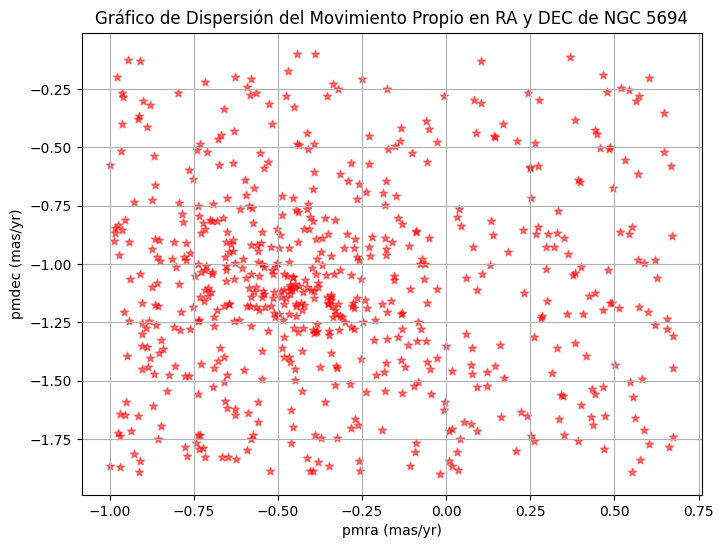

In [39]:
# Haga el gráfico en esta celda

# Creamos el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(pmra, pmdec, alpha=0.5, marker ='*', color='red')

# Configuramos las etiquetas y el título
plt.xlabel('pmra (mas/yr)')
plt.ylabel('pmdec (mas/yr)')
plt.title('Gráfico de Dispersión del Movimiento Propio en RA y DEC de NGC 5694')

# Mostramos el gráfico
plt.grid(True)
plt.show()

Si observa bien, parece que los puntos se concentran hacia la parte izquierda del gráfico. Ese grupo representa los movimientos propios de las estrellas que pertencen al cúmulo globular. Los demás puntos corresponden a los movimientos propios de estrellas de la galaxia que se "colaron" en la línea de visión entre nosotros (Tierra) y el cúmulo.

### c) Generar distribución Gaussiana
Calcule el promedio y la desviación estándar de ambas columnas (**pmra** y **pmdec**) y guárdelos en las variables que se indican.

In [14]:
mu_pmra = pmra.mean()
std_pmra = pmra.std()

mu_pmdec = pmdec.mean()
std_pmdec = pmdec.std()

In [40]:
# Mostramos los resultados
print(f"Promedio de pmra: {mu_pmra}")
print(f"Desviación estándar de pmra: {std_pmra}")
print(f"Promedio de pmdec: {mu_pmdec}")
print(f"Desviación estándar de pmdec: {std_pmdec}")

Promedio de pmra: -0.3123486977209311
Desviación estándar de pmra: 0.43823620785185174
Promedio de pmdec: -1.0897362576861138
Desviación estándar de pmdec: 0.42760876013101434


Con los promedios y desviaciones estandar obtenidas, simule una distribución gaussiana para cada eje del movimieto propio (pmra y pmdec). Recuerda que la distribución gaussiana es de la forma:

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$


Por lo que necesitamos los valores de $x, \mu$ y $\sigma$ para cada caso.

**En ascención recta**:
1. Crea un arreglo de 300 números que estén entre -1.5 y 1. Este sería el $x$
2. Con $\mu$ y $\sigma$ correspondientes a pmra calculados en la celda de arriba, genere los valores $f(x)$. Para eso, utilize la función **norm** de **scipy.stats** que está importada en la siguiente celda. Usa el método **pdf** (probability density function)



**En declinación:**
Haga lo mismo, pero el $x$ sería 300 números que estén entre -2.5 y 0.5.

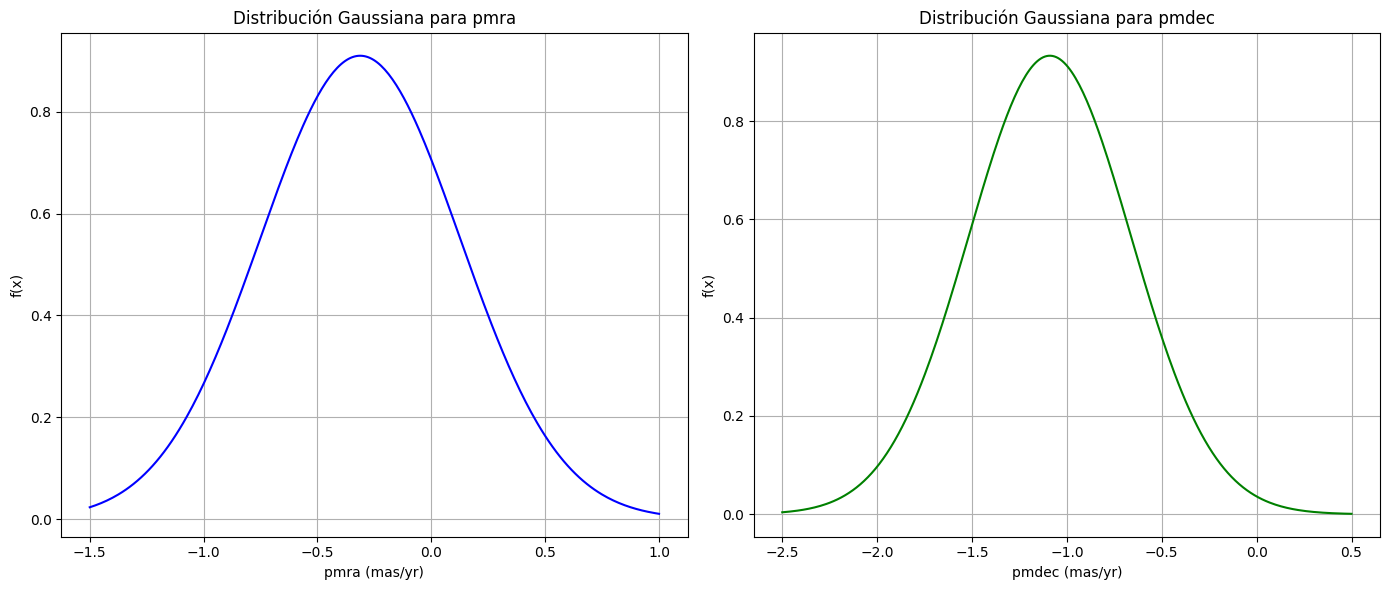

In [41]:
from scipy.stats import norm

# Creamos un arreglo de 300 números entre -1.5 y 1 para pmra
x_pmra = np.linspace(-1.5, 1, 300)

# Calculamos la función de densidad de probabilidad (f(x)) para pmra
f_pmra = norm.pdf(x_pmra, mu_pmra, std_pmra)

# Creamos un arreglo de 300 números entre -2.5 y 0.5 para pmdec
x_pmdec = np.linspace(-2.5, 0.5, 300)

# Calculamos la función de densidad de probabilidad (f(x)) para pmdec
f_pmdec = norm.pdf(x_pmdec, mu_pmdec, std_pmdec)

# Graficamos las distribuciones gaussianas
plt.figure(figsize=(14, 6))

# Gráfico para pmra
plt.subplot(1, 2, 1)
plt.plot(x_pmra, f_pmra, color='blue')
plt.title('Distribución Gaussiana para pmra')
plt.xlabel('pmra (mas/yr)')
plt.ylabel('f(x)')
plt.grid(True)

# Gráfico para pmdec
plt.subplot(1, 2, 2)
plt.plot(x_pmdec, f_pmdec, color='green')
plt.title('Distribución Gaussiana para pmdec')
plt.xlabel('pmdec (mas/yr)')
plt.ylabel('f(x)')
plt.grid(True)

# Mostramos los graficos
plt.tight_layout()
plt.show()

Usamos la función norm de scipy.stats para simular la función mostrada en el enunciado y asi poder llegar a los valores buscados, además de esto calculamos la densidad de cada grafico con el metodo pdf.

Podemos notar que las curvas Gaussianas de ambos graficos son bastante similares, excepto que la de pmra abarca más valores en el eje x.

### d) Graficar histogramas de la distribución de movimientos propios junto a la distribución Gaussiana

Grafique con matplotlib un hitograma (busque qué método de matplotlib sirve) de pmra y sobre él grafique la gaussiana correspondiente.

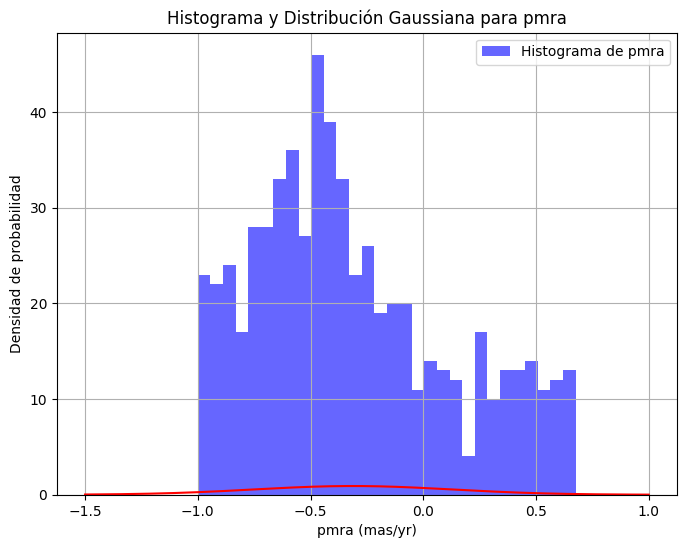

In [42]:
# Graficamos el histograma de pmra
plt.figure(figsize=(8, 6))
plt.hist(pmra, bins=30, alpha=0.6, color='blue', label='Histograma de pmra')

# Graficamos la distribución gaussiana
plt.plot(x_pmra, f_pmra, color='red')

# Configuramos etiquetas y título
plt.xlabel('pmra (mas/yr)')
plt.ylabel('Densidad de probabilidad')
plt.title('Histograma y Distribución Gaussiana para pmra')
plt.legend()
plt.grid(True)

# Mostramos el gráfico
plt.show()

Se puede notar que la curva Gaussiana aplicada no es muy util.

Notará que la gaussiana apenas se ve en el gráfico, esto es porque la gaussiana está normalizada (el área bajo la curva es 1), pero esto no es así para el histograma. El problema se puede arreglar incluyendo el parámetro **density=True** en el método que grafica el histograma.

Repita la gráfica anterior pero ahora tanto para pmra como para pmdec e incorporando la modificación de **density=True**. Muestre los gráficos en una misma figura como subplots.

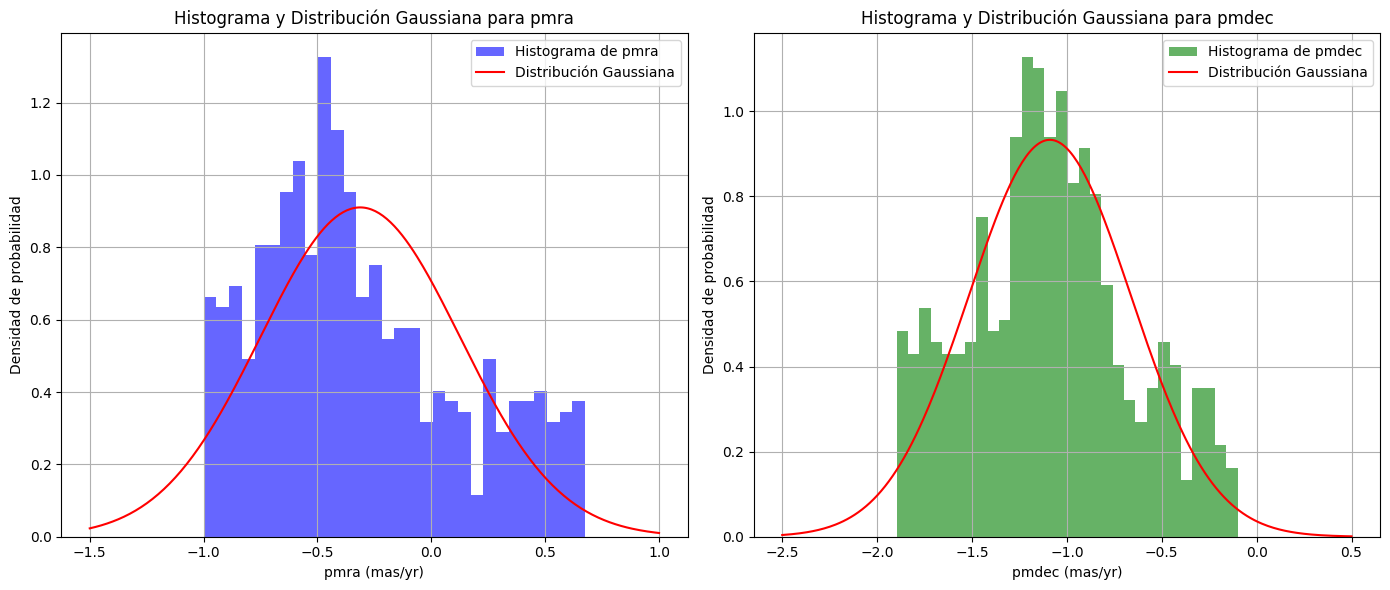

In [18]:
# Configuramos la figura para dos subplots
plt.figure(figsize=(14, 6))

# Histograma y distribución gaussiana para pmra
plt.subplot(1, 2, 1)
plt.hist(pmra, bins=30, density=True, alpha=0.6, color='blue', label='Histograma de pmra')
plt.plot(x_pmra, f_pmra, color='red', label='Distribución Gaussiana')
plt.xlabel('pmra (mas/yr)')
plt.ylabel('Densidad de probabilidad')
plt.title('Histograma y Distribución Gaussiana para pmra')
plt.legend()
plt.grid(True)

# Histograma y distribución gaussiana para pmdec
plt.subplot(1, 2, 2)
plt.hist(pmdec, bins=30, density=True, alpha=0.6, color='green', label='Histograma de pmdec')
plt.plot(x_pmdec, f_pmdec, color='red', label='Distribución Gaussiana')
plt.xlabel('pmdec (mas/yr)')
plt.ylabel('Densidad de probabilidad')
plt.title('Histograma y Distribución Gaussiana para pmdec')
plt.legend()
plt.grid(True)

# Mostramos los graficos
plt.tight_layout()
plt.show()

Ahora las curvas Gaussiana nos ayudan con mayor exactitud a describir los fenomenos vistos en cada grafico.

Repita la figura anterior y ahora agréguele a cada gráfica (pmra y pmdec) una franja vertical que abarque $\mu \pm \sigma$ utilizando **plt.axvspan()**

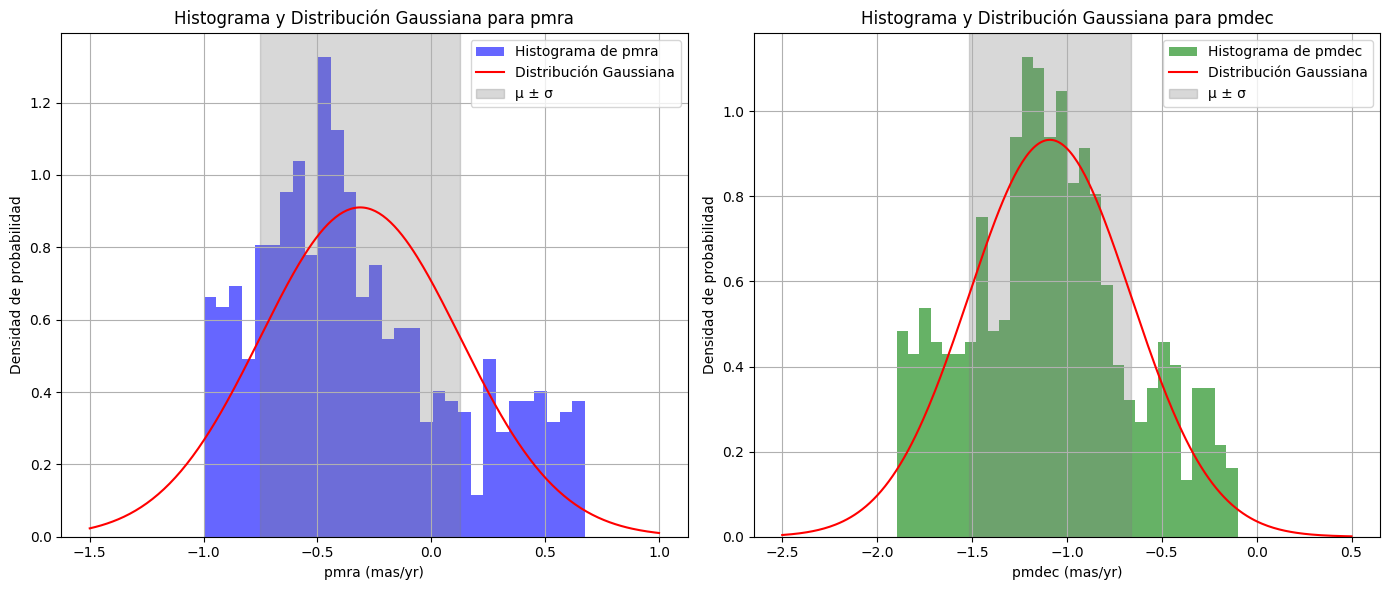

In [43]:
# Configuramos la figura para dos subplots
plt.figure(figsize=(14, 6))

# Histograma y distribución gaussiana para pmra
plt.subplot(1, 2, 1)
plt.hist(pmra, bins=30, density=True, alpha=0.6, color='blue', label='Histograma de pmra')
plt.plot(x_pmra, f_pmra, color='red', label='Distribución Gaussiana')
plt.axvspan(mu_pmra - std_pmra, mu_pmra + std_pmra, color='gray', alpha=0.3, label=f'μ ± σ')
plt.xlabel('pmra (mas/yr)')
plt.ylabel('Densidad de probabilidad')
plt.title('Histograma y Distribución Gaussiana para pmra')
plt.legend()
plt.grid(True)

# Histograma y distribución gaussiana para pmdec
plt.subplot(1, 2, 2)
plt.hist(pmdec, bins=30, density=True, alpha=0.6, color='green', label='Histograma de pmdec')
plt.plot(x_pmdec, f_pmdec, color='red', label='Distribución Gaussiana')
plt.axvspan(mu_pmdec - std_pmdec, mu_pmdec + std_pmdec, color='gray', alpha=0.3, label=f'μ ± σ')
plt.xlabel('pmdec (mas/yr)')
plt.ylabel('Densidad de probabilidad')
plt.title('Histograma y Distribución Gaussiana para pmdec')
plt.legend()
plt.grid(True)

# Mostramos los graficos
plt.tight_layout()
plt.show()

Según las gaussiaas obtenidas, ¿Cuál es la estimación para pmra y pmdec del cúmulo globular?

**Respuesta:** Para pmra la distribución gaussiana parece estar centrada aproximadamente en μ≈-0.5 mas/yr, mientras que para pmdec la distribución gaussiana parece estar centrada aproximadamente en μ≈-1 mas/yr, estos datos representan el valor central de las distribuciones de manera que se pueden usar para estimar los respectivos valores.

# Segunda parte: Señal a Ruido
Para la siguiente parte deberá trabajar con datos de espectros con líneas de emisión. Un espéctro lo puede entender como un gráfico de potencia vs longitud de onda.

Abra el archivo **data_spectra.csv** con pandas y muestre el DataFrame. (No es necesario montar de nuevo el drive porque ya se hizo en la parte anterior).

Las columnas **obs** corresponden a observaciones (espectro) de un objeto, en la que cada valor corresponde a la potencia asociada a una longitud de onda. La columna **Wlth** corresponde a las longitudes de onda.

In [20]:
# Lea y muestre el DataFrame aquí
path_archivo1 = '/content/drive/MyDrive/CD2201-16/Tarea2/data_spectra.csv'
data = pd.read_csv(path_archivo1)
data

,Unnamed: 0,Wlth,obs_1,obs_2,obs_3,obs_4,obs_5,obs_6,obs_7,obs_8,...,obs_11,obs_12,obs_13,obs_14,obs_15,obs_16,obs_17,obs_18,obs_19,obs_20
0,0,13893.158801,0.673065,1.048759,1.135927,1.365672,1.205216,0.777480,0.777436,0.723454,...,0.851846,0.828067,0.964739,0.894189,0.734513,0.888324,0.764781,1.213573,0.952286,0.714581
1,1,13894.381791,1.218438,1.384774,0.647763,1.286700,1.223776,1.295540,1.289402,0.979057,...,0.792874,0.792945,1.115174,1.228799,0.755613,0.933819,1.020234,1.121144,1.394790,0.795326
2,2,13895.604780,1.244496,0.775893,1.213005,0.898531,1.203176,1.130615,1.133467,0.645016,...,1.221805,1.081824,0.871400,1.229938,0.928502,0.949589,1.276152,0.616311,1.130431,1.004481
3,3,13896.827769,1.395414,0.853016,0.929927,0.617134,1.101129,1.363642,0.810799,0.901758,...,0.847701,1.200020,1.196751,1.047428,0.729014,1.230125,1.368756,0.777179,0.810549,0.716121
4,4,13898.050759,1.013531,0.891468,1.125626,1.354080,0.681703,0.968364,0.630361,1.299735,...,0.612065,0.706618,0.696333,1.021694,1.160951,1.081304,1.387839,0.791448,0.876079,0.704909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,1415,15623.688705,0.693123,1.222298,1.249391,1.105946,1.374470,0.780127,1.094418,1.061418,...,1.350584,0.760689,1.397787,0.627549,0.698279,0.815585,0.813801,1.079114,0.652794,0.897564
1416,1416,15624.911694,1.387281,1.332809,1.151107,1.254744,1.331042,0.979532,0.881491,1.209496,...,1.177786,0.711269,1.098026,0.829656,1.314102,1.167825,1.275656,0.947942,0.827006,1.365960
1417,1417,15626.134683,1.208096,0.914692,0.874394,1.083929,1.352754,0.606663,0.657862,1.055156,...,0.656540,0.970074,0.997054,1.222855,0.970080,1.306091,1.173684,0.832711,1.381874,1.149033
1418,1418,15627.357673,1.167845,1.261191,1.306496,0.945764,1.119779,0.892840,1.305614,0.618601,...,0.827102,0.619797,1.307590,0.979190,0.767770,1.170864,0.892064,1.355639,0.753463,1.000630


### a) Gráfico de primer espectro:
Grafique el espectro de la primera observación (columna **obs_1** vs columna **Wlth**) y responda: ¿Cuántas líneas de emisión detecta a simple vista?

**Respuesta:** Se pueden ver 3 lineas de emisión, todas cercanas a la longitud de onda de 15250.

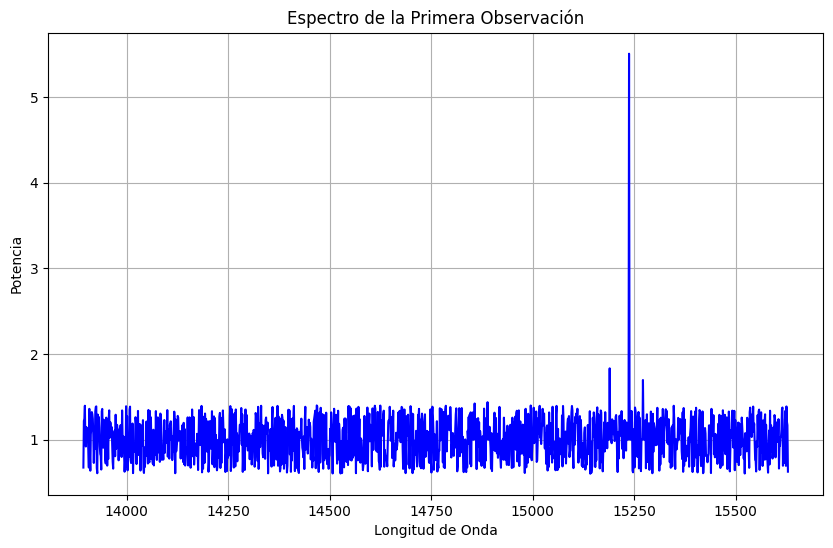

In [21]:
# Grafique aquí

# Seleccionamos las columnas relevantes
wlth = data['Wlth']
obs_1 = data['obs_1']

# Graficamos el espectro de la primera observación
plt.figure(figsize=(10, 6))
plt.plot(wlth, obs_1, color='blue')
plt.title('Espectro de la Primera Observación')
plt.xlabel('Longitud de Onda')
plt.ylabel('Potencia')
plt.grid(True)
plt.show()

Notará que los valores del eje y están centrados alrededor de 1. Centre la observación en 0. Para esto, estime el valor medio del ruido y réstelo a todo el espectro ¿Cómo piensa que podria hacer esto?. Grafique el espectro resultante.

**Respuesta:** Para estimar el valor del ruido podríamos sacar el promedio de valores en las zonas del grafico las cuales no tienen peaks y luego ese valor podriamos restarlo al resto de valores originalmente registrados para conseguir un registro sin mayor ruido.

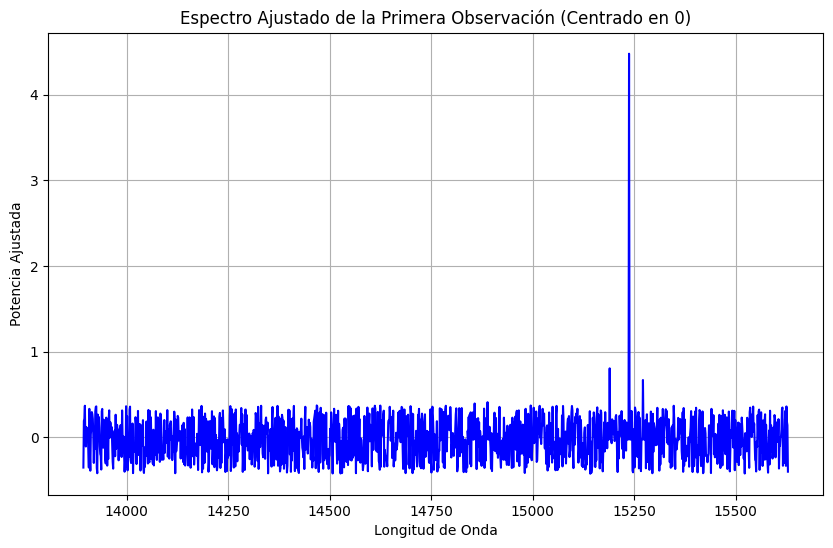

Valor medio del ruido estimado: 1.03


In [44]:
# Grafique el espectro centrado en 0 aquí

# Estimamos el valor medio del ruido (asumimos que el ruido está en las áreas donde no hay picos prominentes)
# Aquí usamos un intervalo de longitud de onda donde se espera menos emisión
ruido_region = obs_1[(wlth < 14000) | (wlth > 15000)]
mean_ruido = ruido_region.mean()

# Restamos el valor medio del ruido del espectro
adjusted_spectrum = obs_1 - mean_ruido

# Graficamos el espectro ajustado
plt.figure(figsize=(10, 6))
plt.plot(wlth, adjusted_spectrum, color='blue')
plt.title('Espectro Ajustado de la Primera Observación (Centrado en 0)')
plt.xlabel('Longitud de Onda')
plt.ylabel('Potencia Ajustada')
plt.grid(True)
plt.show()

# Mostramos el valor medio del ruido para referencia
print(f'Valor medio del ruido estimado: {mean_ruido:.2f}')

### b) Nivel de ruido:

En esta parte estimaremos el nivel de ruido de la la observación 1 de una forma distinta. Para esto siga los sigueintes pasos:

1. Tome la columna **obs_1** y guarde en la variable **ruido** un subconjunto de datos centrados en la media de **obs_1** con un margen de $\pm 3 \sigma$, con $\sigma$ la desviación estándar de **obs_1**.

Note que este subconjunto corresponde a ruido principalmente.

In [46]:
# Seleccionamos las columnas relevantes
obs_1 = data['obs_1']

# Calculamos la media y la desviación estándar de obs_1
mean_obs_1 = obs_1.mean()
std_obs_1 = obs_1.std()

# Definimos el margen de ±3σ
margen_bajo = mean_obs_1 - 3 * std_obs_1
margen_alto = mean_obs_1 + 3 * std_obs_1

ruido = obs_1[(obs_1 >= margen_bajo ) & (obs_1 <= margen_alto)]

print(f'Valor medio de obs_1: {mean_obs_1:.2f}')
print(f'Desviación estándar de obs_1: {std_obs_1:.2f}')
print(f'Margen de ±3σ: ({margen_bajo:.2f}, {margen_alto:.2f})')
print(f'Número de puntos en el subconjunto de ruido: {len(ruido)}')
print(f'Primeros 5 valores del subconjunto de ruido:\n{ruido.head()}')

Valor medio de obs_1: 0.00
Desviación estándar de obs_1: 0.26
Margen de ±3σ: (-0.77, 0.77)
Número de puntos en el subconjunto de ruido: 1418
Primeros 5 valores del subconjunto de ruido:
0   -0.338588
1    0.206785
2    0.232843
3    0.383761
4    0.001879
Name: obs_1, dtype: float64


2. Reste la media del ruido al espectro para centrar y grafique el espectro resultante.

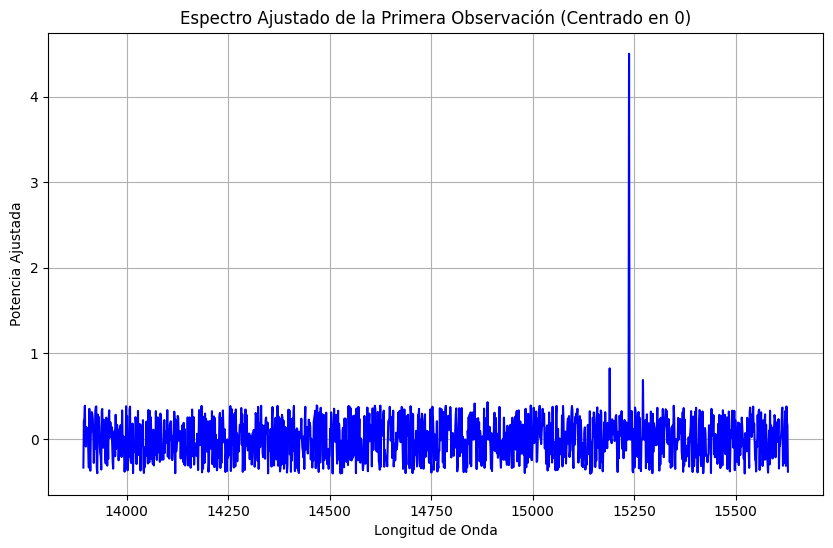

Media del ruido estimado: -0.00


In [47]:
# Grafique el espectro centrado en 0 aquí

# Calculamos la media del ruido
mean_ruido = ruido.mean()

# Restar la media del ruido del espectro
adjusted_spectrum = obs_1 - mean_ruido

# Graficar el espectro ajustado
plt.figure(figsize=(10, 6))
plt.plot(wlth, adjusted_spectrum, color='blue')
plt.title('Espectro Ajustado de la Primera Observación (Centrado en 0)')
plt.xlabel('Longitud de Onda')
plt.ylabel('Potencia Ajustada')
plt.grid(True)
plt.show()

# Imprimir la media del ruido para referencia
print(f'Media del ruido estimado: {mean_ruido:.2f}')

3. Calcule $\sigma$ del ruido y grafique un margen de $\pm n*\sigma$ (con $n$ entero) sobre el espectro como dos líneas horizontales. ¿Qué valor de $n$ le parece adecuado y por qué? este será el nivel de ruido.

**Respuesta:** Las fronteras de ruido se adecuan de mejor manera tomando $n=2$, donde con este parametro las fronteras encapsulan totalmente el ruido visto en el grafico sin pasar a llevar las lineas de emisión.

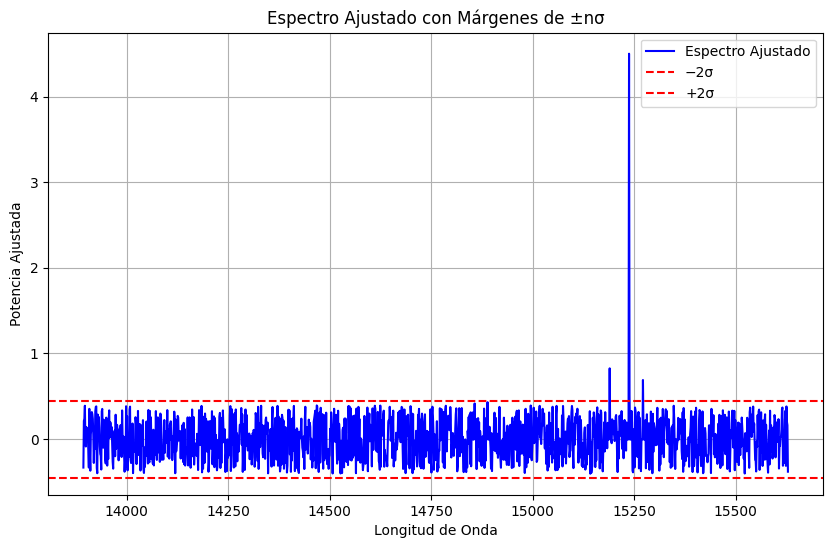

Desviación estándar del ruido: 0.22
Márgenes ±2σ: (-0.45, 0.45)


In [57]:
# Calculamos la desviación estándar del ruido
std_ruido = ruido.std()

# Definimos el margen de ±nσ
n = 2
lower_bound_noise = mean_ruido - n * std_ruido
upper_bound_noise = mean_ruido + n * std_ruido

# Graficamos el espectro ajustado y las líneas de margen
plt.figure(figsize=(10, 6))
plt.plot(wlth, adjusted_spectrum, color='blue', label='Espectro Ajustado')
plt.axhline(y=lower_bound_noise, color='red', linestyle='--', label=f'−{n}σ')
plt.axhline(y=upper_bound_noise, color='red', linestyle='--', label=f'+{n}σ')
plt.title('Espectro Ajustado con Márgenes de ±nσ')
plt.xlabel('Longitud de Onda')
plt.ylabel('Potencia Ajustada')
plt.legend()
plt.grid(True)
plt.show()

# Imprimimos los valores de la desviación estándar del ruido y de los márgenes
print(f'Desviación estándar del ruido: {std_ruido:.2f}')
print(f'Márgenes ±{n}σ: ({lower_bound_noise:.2f}, {upper_bound_noise:.2f})')

### c) Disminución de $\sigma$

Ahora verá cómo el nivel de ruido disminuye al promediar observaciones. Siga los siguientes pasos:

1. Centre todas las observaciones en 0 de la misma manera hecha en ela parte b). Como consejo, puede recorrer las columnas del DataFrame con un for y modificar solo las que correspondan a una observación.

In [60]:
# Identificamos las columnas de observaciones
obs_columns = [col for col in data.columns if col.startswith('obs_')]

# Centramos todas las observaciones en 0
for col in obs_columns:
    # Calcular la media de la observación
    mean_col = data[col].mean()

    # Restamos la media a los datos de la observación
    data[col] = data[col] - mean_col

# Mostramos las primeras filas del DataFrame actualizado para verificar
print(data.head())

   Unnamed: 0          Wlth     obs_1     obs_2     obs_3     obs_4     obs_5  \
0           0  13893.158801 -0.338588  0.044869  0.129951  0.359538  0.198188   
1           1  13894.381791  0.206785  0.380884 -0.358213  0.280566  0.216748   
2           2  13895.604780  0.232843 -0.227997  0.207029 -0.107603  0.196148   
3           3  13896.827769  0.383761 -0.150874 -0.076049 -0.389000  0.094101   
4           4  13898.050759  0.001879 -0.112423  0.119651  0.347946 -0.325325   

      obs_6     obs_7     obs_8  ...    obs_12    obs_13    obs_14    obs_15  \
0 -0.227115 -0.221368 -0.289408  ... -0.164819 -0.044796 -0.102306 -0.271097   
1  0.290946  0.290598 -0.033806  ... -0.199941  0.105639  0.232304 -0.249997   
2  0.126021  0.134662 -0.367846  ...  0.088938 -0.138135  0.233443 -0.077108   
3  0.359048 -0.188005 -0.111104  ...  0.207134  0.187216  0.050933 -0.276596   
4 -0.036231 -0.368443  0.286873  ... -0.286268 -0.313202  0.025199  0.155341   

     obs_16    obs_17    obs_18 

2. A continuación verá cómo cambia sigma a medida que promediamos los espectros. Para esto realice el siguiente algoritmo:

 - Calcule $\sigma$ de **obs_1**.
 - Promedie **obs_1** y **obs_2**, y calcule $\sigma$.
 - Promedie **obs_1**, **obs_2** y **obs_3**, y calcule $\sigma$.
 - Siga hasta haber promediado todas las observaciones (recuerde guardar los valores de $\sigma$)

 Añada al DataFrame una nueva columna **obs_all** que corresponda al promedio de todos los espectros.

In [61]:
# Inicializamos una lista para guardar los valores de sigma
sigma_values = []

# Inicializamos un promedio acumulativo
average_spectrum = pd.Series([0] * len(data), index=data.index)

# Calculamos sigma para cada promedio acumulativo
for i, col in enumerate(obs_columns):
    # Actualizamos el promedio acumulativo
    average_spectrum = average_spectrum + data[col]

    # Calculamos el promedio de las observaciones hasta ahora
    current_avg = average_spectrum / (i + 1)

    # Calculamos la desviación estándar del promedio acumulativo
    current_std = current_avg.std()
    sigma_values.append(current_std)

    print(f'Sigma después de promediar {i + 1} observaciones ({col}): {current_std:.2f}')

# Añadimos la columna obs_all al DataFrame con el promedio de todos los espectros
data['obs_all'] = current_avg

# Mostramos el DataFrame actualizado y los valores de sigma
print(data.head())
print(f'Valores de sigma a lo largo del proceso: {sigma_values}')

Sigma después de promediar 1 observaciones (obs_1): 0.26
Sigma después de promediar 2 observaciones (obs_2): 0.20
Sigma después de promediar 3 observaciones (obs_3): 0.17
Sigma después de promediar 4 observaciones (obs_4): 0.16
Sigma después de promediar 5 observaciones (obs_5): 0.15
Sigma después de promediar 6 observaciones (obs_6): 0.14
Sigma después de promediar 7 observaciones (obs_7): 0.14
Sigma después de promediar 8 observaciones (obs_8): 0.13
Sigma después de promediar 9 observaciones (obs_9): 0.13
Sigma después de promediar 10 observaciones (obs_10): 0.13
Sigma después de promediar 11 observaciones (obs_11): 0.12
Sigma después de promediar 12 observaciones (obs_12): 0.12
Sigma después de promediar 13 observaciones (obs_13): 0.12
Sigma después de promediar 14 observaciones (obs_14): 0.12
Sigma después de promediar 15 observaciones (obs_15): 0.12
Sigma después de promediar 16 observaciones (obs_16): 0.12
Sigma después de promediar 17 observaciones (obs_17): 0.12
Sigma después d

 3. Finalmente grafique los valores de $\sigma$ en funcion de $N$, con $N$ el numero de observaciones promediada. ¿Qué ocurre con $\sigma$? ¿Es esperado el resultado? Comente.

**Respuesta:** Se puede notar que el valor de $\sigma$ disminuye de manera exponencial a lo largo de que se van haciendo más observaciones, esto tiene mucho sentido si notamos que la formula para $\sigma_{promedio}$ se puede expresar como $\sigma_{promedio} = \frac{\sigma}{\sqrt{N}}$.

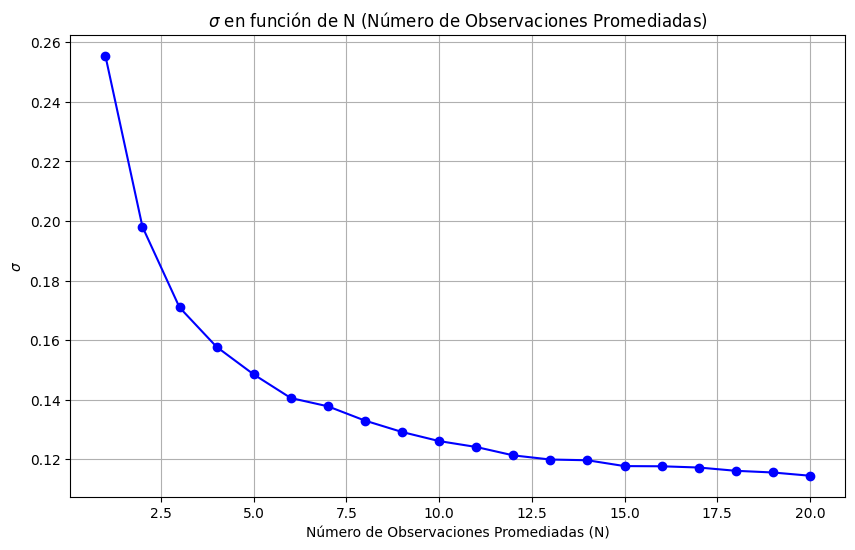

In [33]:
# Número de observaciones (N)
N = list(range(1, len(sigma_values) + 1))

# Graficamos sigma en función de N
plt.figure(figsize=(10, 6))
plt.plot(N, sigma_values, marker='o', linestyle='-', color='blue')

# Añadimos etiquetas y título
plt.title(r'$\sigma$ en función de N (Número de Observaciones Promediadas)')
plt.xlabel('Número de Observaciones Promediadas (N)')
plt.ylabel(r'$\sigma$')
plt.grid(True)
plt.show()


### d) Promedio de observaciones

Finalmente grafique el promedio de todas las observaciones (columna **obs_all** vs columna **Wlth**). ¿Cuántas líneas de emisión puede apreciar ahora? ¿Podría explicar a qué se debe? Comente.

**Respuesta:** Se pueden notar 5 lineas de emisión, 2 más que antes. Esto se debe a que el proceso de promediado ha reducido el nivel de ruido, poniendo en mayor claridad los datos entregados.

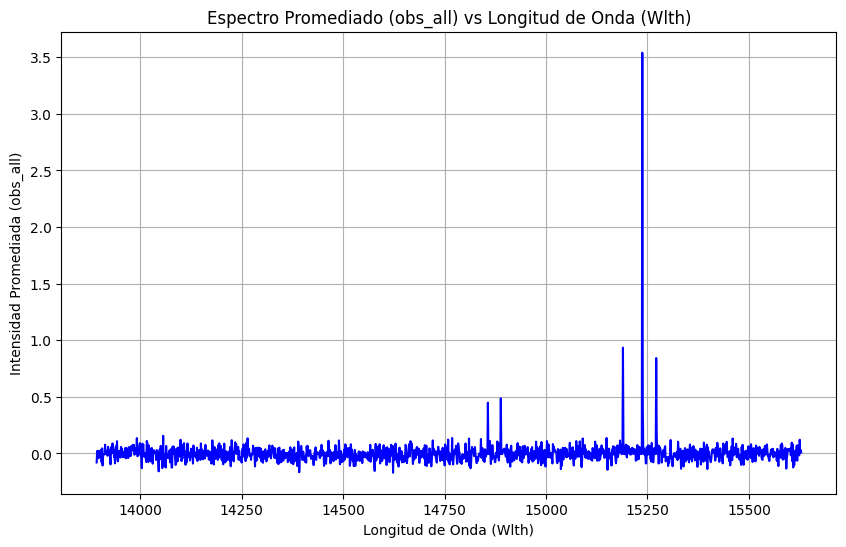

In [63]:
# Graficamos el promedio de todas las observaciones vs Wlth
plt.figure(figsize=(10, 6))
plt.plot(data['Wlth'], data['obs_all'], color='blue')

# Añadimos etiquetas y título
plt.title('Espectro Promediado (obs_all) vs Longitud de Onda (Wlth)')
plt.xlabel('Longitud de Onda (Wlth)')
plt.ylabel('Intensidad Promediada (obs_all)')
plt.grid(True)
plt.show()